DATASET INFORMATION:



Air Quality Data Set 
Abstract: Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

Data Set Characteristics:  

Multivariate, Time-Series

Number of Instances:

9358

Area:

Computer

Attribute Characteristics:

Real

Number of Attributes:

15

Date Donated

2016-03-23

Missing Values?

Yes

Number of Web Hits:

160639


Source:

Saverio De Vito (saverio.devito '@' enea.it), ENEA - National Agency for New Technologies, Energy and Sustainable Economic Development


Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. 
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded. 


Attribute Information:

0 Date	(DD/MM/YYYY) 
1 Time	(HH.MM.SS) 
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	
7 True hourly averaged NOx concentration in ppb (reference analyzer) 
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
12 Temperature in Â°C	
13 Relative Humidity (%) 
14 AH Absolute Humidity 



# new version

In [20]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=15,10

In [2]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#define number of columns from csv
use=list(np.arange(len(col)))

#read the data from csv
df_air=pd.read_csv("AirQualityUCI.csv",header=None,skiprows=1,names=col,na_filter=True,na_values=-200,usecols=use,sep=";", decimal=",",index_col="DATE")
df_air.head()

,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
DATE,,,,,,,,,,,,,,
10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [3]:
#See the end records of dataframe
df_air.tail()

,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
DATE,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_air.dtypes

TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [5]:
#drop end rows with NaN values
df_air.dropna(how='all',inplace=True)
#drop RH NAN rows
df_air.dropna(thresh=10,axis=0,inplace=True)

In [6]:
df_air.shape

(8991, 14)

In [7]:
df_air.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.833166,218.607666,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.436472,217.080037,206.615130,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,66.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,145.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.800000,1231.000000,297.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [8]:
#Split hour from time into new column
df_air['HOUR']=df_air['TIME'].apply(lambda x: int(x.split('.')[0]))
df_air.HOUR.head()
df_air.head()

,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR
DATE,,,,,,,,,,,,,,,
10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22


In [9]:
df_air.drop('TIME', axis=1, inplace=True)
df_air.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR
DATE,,,,,,,,,,,,,,
10/03/2004,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
10/03/2004,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
10/03/2004,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
10/03/2004,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
10/03/2004,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22


In [10]:
print('Count of missing values:\n',df_air.shape[0]-df_air.count())

Count of missing values:
 CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


In [11]:
#df_air['DATE']=pd.to_datetime(df_air.DATE, format='%d/%m/%Y')   #Format date column

In [12]:
# set the index as date
#df_air.set_index('DATE',inplace=True)
#df_air.head()

In [13]:
#df_air['MONTH']=df_air.index.month     #Create month column (Run once)
#df_air.reset_index(inplace=True)
#df_air.head()

In [14]:

df_air.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR
DATE,,,,,,,,,,,,,,
10/03/2004,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
10/03/2004,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
10/03/2004,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
10/03/2004,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
10/03/2004,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22


In [15]:
df_air.drop('NMHC_GT',axis=1,inplace=True)    #drop col

In [16]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['DATE','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['DATE','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['DATE','HOUR'])['NO2_GT'].transform('mean'))

In [17]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: CO_GT           1647
PT08_S1_CO         0
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


In [18]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

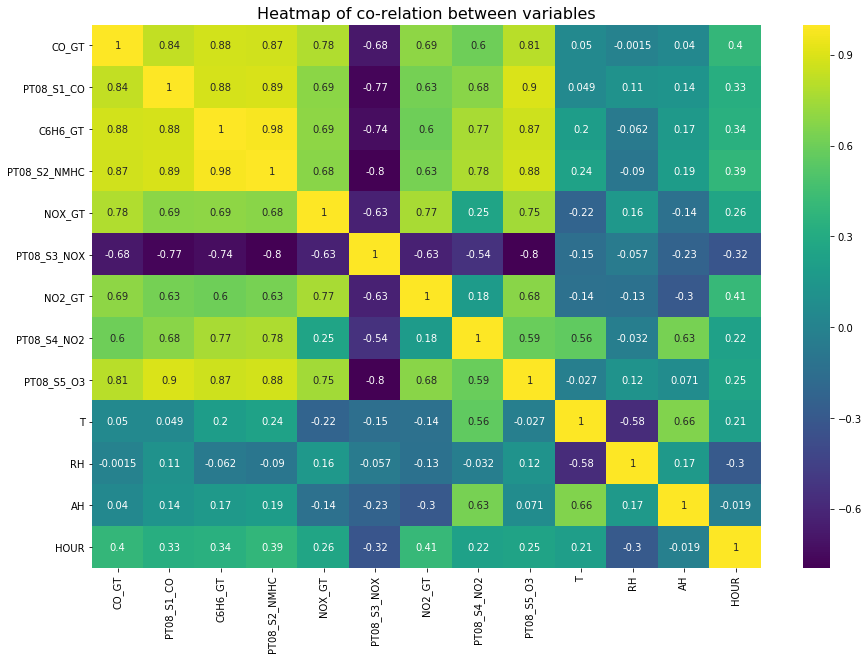

In [21]:
#Use heatmap to see corelation between variables
sns.heatmap(df_air.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import glob
from datetime import datetime
from keras.callbacks import EarlyStopping
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [28]:

dataset = df_air.RH.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

6293 2698


In [21]:
''' Dividing data in test and train sets '''
dataset = df_air.values
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

6293 2698


In [29]:
''' Helper to create time frames with look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [30]:
''' Creating time frames with look backs '''
look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


6285
2690


In [31]:
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print('Training data size:',trainX.shape)
print('Test data size:',testX.shape)

Training data size: (6285, 1, 8)
Test data size: (2690, 1, 8)


In [32]:
''' Fitting the data in LSTM Deep Learning model '''
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
#history = model.fit(trainX, trainY, epochs=20, batch_size=100, verbose=2)
history = model.fit(trainX, trainY, epochs=50, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)
#end = time.time()
# Training Phase
model.summary()

Train on 6285 samples, validate on 2690 samples
Epoch 1/50
6285/6285 [==============================] - 1s 171us/step - loss: 0.1821 - val_loss: 0.1025
Epoch 2/50
6285/6285 [==============================] - 0s 51us/step - loss: 0.0937 - val_loss: 0.0724
Epoch 3/50
6285/6285 [==============================] - 0s 52us/step - loss: 0.0639 - val_loss: 0.0605
Epoch 4/50
6285/6285 [==============================] - 0s 51us/step - loss: 0.0554 - val_loss: 0.0547
Epoch 5/50
6285/6285 [==============================] - 0s 52us/step - loss: 0.0523 - val_loss: 0.0522
Epoch 6/50
6285/6285 [==============================] - 0s 51us/step - loss: 0.0505 - val_loss: 0.0496
Epoch 7/50
6285/6285 [==============================] - 0s 53us/step - loss: 0.0488 - val_loss: 0.0488
Epoch 8/50
6285/6285 [==============================] - 0s 52us/step - loss: 0.0478 - val_loss: 0.0476
Epoch 9/50
6285/6285 [==============================] - 0s 52us/step - loss: 0.0468 - val_loss: 0.0467
Epoch 10/50
6285/6285 [=

In [35]:
''' Predicting 1 years data based on 5 years of previous data '''
yhat = model.predict(testX)


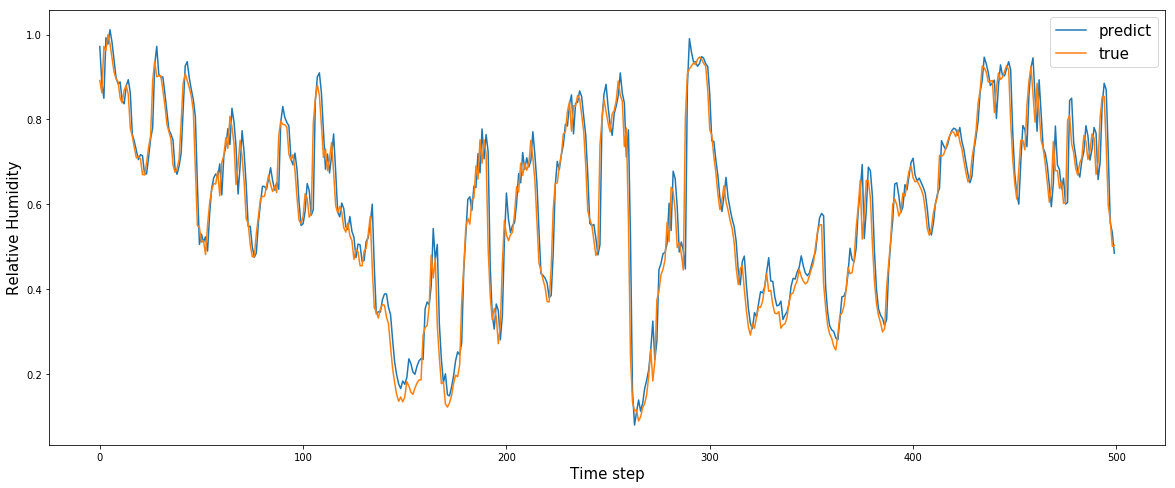

In [44]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()

pyplot.ylabel('Relative Humidity', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)

pyplot.show()

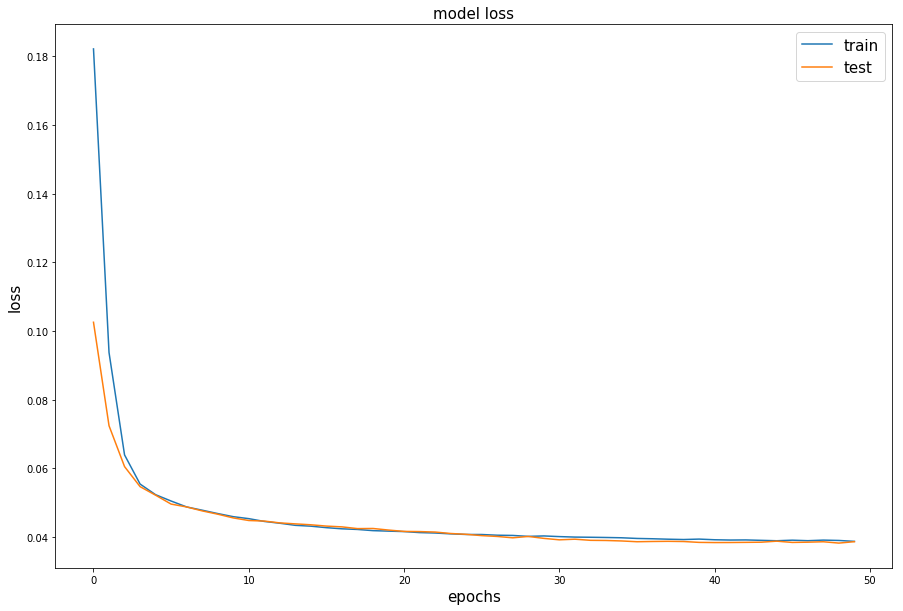

In [43]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
#pyplot.legend()

pyplot.title('model loss',size=15)
pyplot.ylabel('loss',size=15)
pyplot.xlabel('epochs',size=15)
pyplot.legend(loc='upper right',fontsize=15)

pyplot.show()